## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Data Cleaning/ Prep

In [2]:
plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
player_play = pd.read_csv('player_play.csv')
games = pd.read_csv('games.csv')


In [5]:
# Load the pre-saved CSV file
combined_df_kc_tracking = pd.read_csv("combined_tracking_kc.csv")

In [7]:
#you dont need to run the chunk below since i sent you the csv above

In [46]:
# combining the tracking data and using only KC

# File path pattern for all weekly files
file_pattern = "nfl-big-data-bowl-2025/tracking_week_*.csv"
# List to store each filtered DataFrame
filtered_dataframes = []
# Loop through each file that matches the pattern
for file in glob.glob(file_pattern):
    # Read the CSV file
    df = pd.read_csv(file)
    # Filter the DataFrame to only include rows where club is 'KC'
    df_kc_tracking = df[df['club'] == 'KC']
    # Append the filtered data to the list
    filtered_dataframes.append(df_kc_tracking)
# Concatenate all filtered DataFrames into a single DataFrame
combined_df_kc_tracking = pd.concat(filtered_dataframes, ignore_index=True)
# Display or save the final DataFrame
print(combined_df_kc_tracking.head())
# Save the concatenated DataFrame to a CSV file
combined_df_kc_tracking.to_csv("combined_tracking_kc.csv", index=False)

       gameId  playId    nflId  displayName  frameId    frameType  \
0  2022101000      57  42406.0  Frank Clark        1  BEFORE_SNAP   
1  2022101000      57  42406.0  Frank Clark        2  BEFORE_SNAP   
2  2022101000      57  42406.0  Frank Clark        3  BEFORE_SNAP   
3  2022101000      57  42406.0  Frank Clark        4  BEFORE_SNAP   
4  2022101000      57  42406.0  Frank Clark        5  BEFORE_SNAP   

                    time  jerseyNumber club playDirection      x      y     s  \
0  2022-10-11 00:15:50.4          55.0   KC         right  40.59  25.43  1.46   
1  2022-10-11 00:15:50.5          55.0   KC         right  40.54  25.57  1.50   
2  2022-10-11 00:15:50.6          55.0   KC         right  40.48  25.73  1.58   
3  2022-10-11 00:15:50.7          55.0   KC         right  40.43  25.90  1.63   
4  2022-10-11 00:15:50.8          55.0   KC         right  40.37  26.06  1.64   

      a   dis       o     dir                 event  
0  0.78  0.15  342.67  339.31  huddle_break_

In [9]:
# filter the other data for KC 

# Filter plays data for Kansas City Chiefs
kc_plays = plays[plays['possessionTeam'] == 'KC']

# Filter player_play data for Kansas City Chiefs
kc_player_play = player_play[player_play['teamAbbr'] == 'KC']

# Filter games data for Kansas City Chiefs
kc_games = games[(games['homeTeamAbbr'] == 'KC') | (games['visitorTeamAbbr'] == 'KC')]

# Use the combined tracking data already filtered for KC
kc_tracking = combined_df_kc_tracking


# EDA 

In [67]:
kc_plays['playType'] = kc_plays['passResult'].apply(lambda x: 'run' if pd.isnull(x) else 'pass')
print(kc_plays[['passResult', 'playType']].head())

    passResult playType
3            C     pass
87         NaN      run
105          C     pass
111          C     pass
116          C     pass


## Play Tendencies

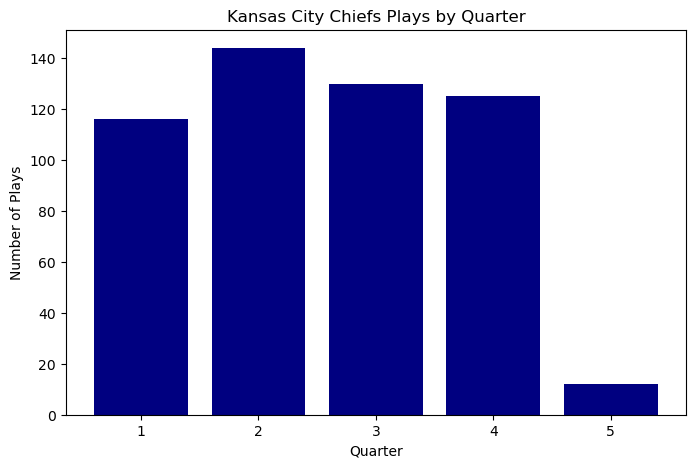

/var/folders/ns/3n6kdbr92hx17d34sn3ytp980000gn/T/ipykernel_1775/865094973.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_vs_pass_counts.index, y=run_vs_pass_counts.values, palette=[primary_color, secondary_color], dodge=False)


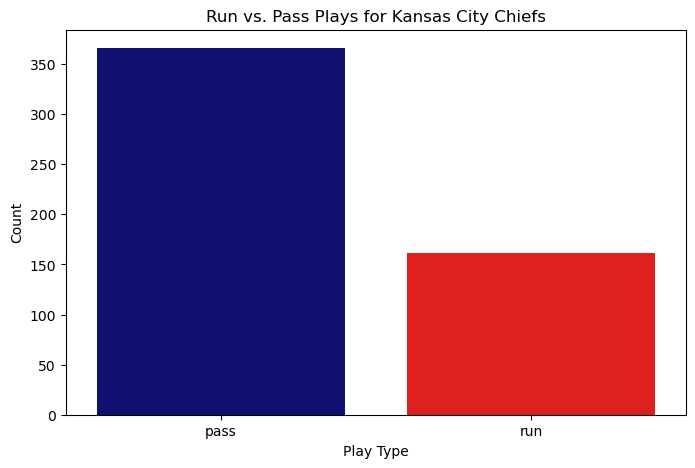

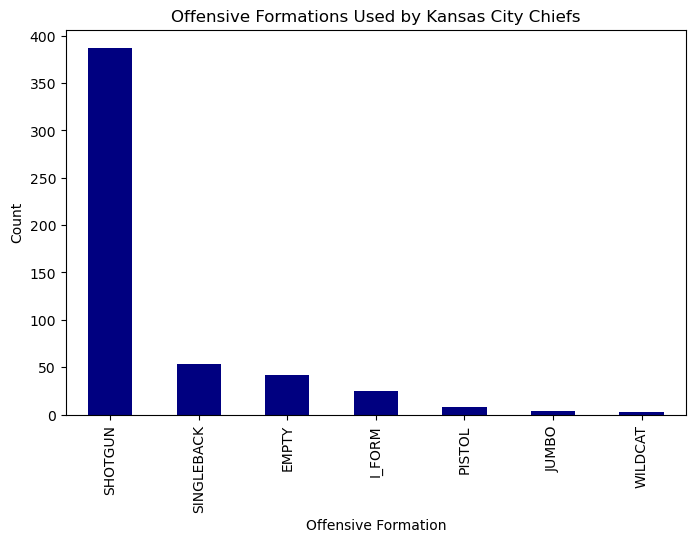

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define consistent colors
primary_color = 'navy'
secondary_color = 'red'

# Play count by quarter
# Count plays by quarter
plays_by_quarter = kc_plays['quarter'].value_counts().sort_index()

# Plot plays by quarter
plt.figure(figsize=(8, 5))
plt.bar(plays_by_quarter.index, plays_by_quarter.values, color=primary_color)
plt.xlabel('Quarter')
plt.ylabel('Number of Plays')
plt.title('Kansas City Chiefs Plays by Quarter')
plt.show()

# KC run or pass
# Count run vs. pass plays 
run_vs_pass_counts = kc_plays['playType'].value_counts()

# Plot run vs. pass play counts 
plt.figure(figsize=(8, 5))
sns.barplot(x=run_vs_pass_counts.index, y=run_vs_pass_counts.values, palette=[primary_color, secondary_color], dodge=False)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Run vs. Pass Plays for Kansas City Chiefs')
plt.show()

# Offensive formation usage
# Count offensive formations
formation_counts = kc_plays['offenseFormation'].value_counts()

# Plot offensive formation usage
plt.figure(figsize=(8, 5))
formation_counts.plot(kind='bar', color=primary_color)
plt.xlabel('Offensive Formation')
plt.ylabel('Count')
plt.title('Offensive Formations Used by Kansas City Chiefs')
plt.show()


## Player level EDA

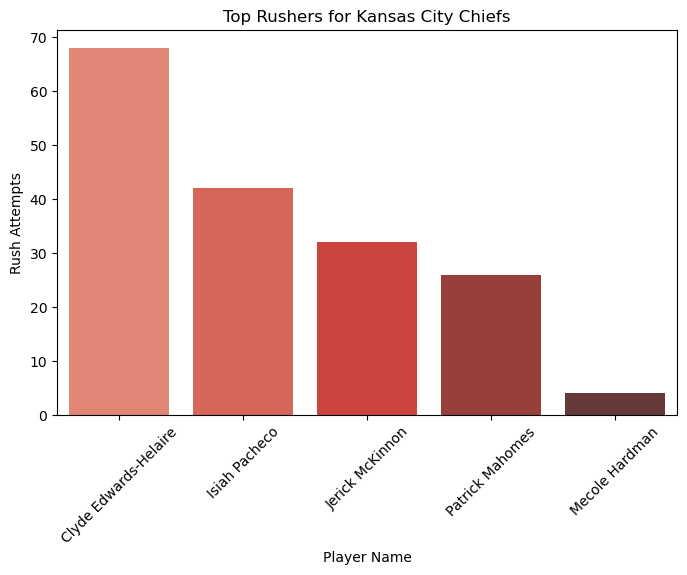

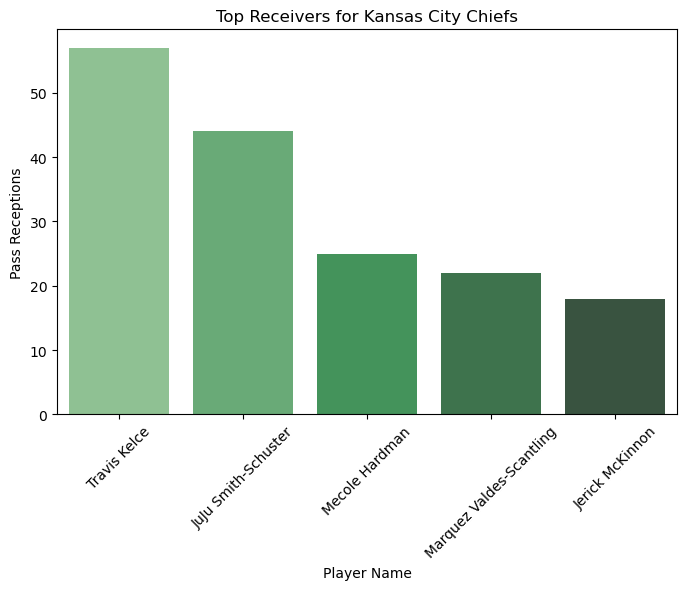

In [381]:
# Top players by rush attempts
top_rushers = kc_player_play[kc_player_play['hadRushAttempt'] == 1]['nflId'].value_counts().head(5)

# Convert the Series to a DataFrame and reset the index
top_rushers = top_rushers.reset_index()
top_rushers.columns = ['nflId', 'rushAttempts']  # Rename columns for clarity

# Merge with the players dataset to get player names
top_rushers = pd.merge(top_rushers, players, on='nflId', how='left')

# Plot top rushers 
plt.figure(figsize=(8, 5))
sns.barplot(x='displayName', y='rushAttempts', hue='displayName', dodge=False, data=top_rushers, palette='Reds_d', legend=False)
plt.xlabel('Player Name')
plt.ylabel('Rush Attempts')
plt.title('Top Rushers for Kansas City Chiefs')
plt.legend([], [], frameon=False)  # Remove legend
plt.xticks(rotation=45)
plt.show()

# Top players by pass receptions
top_receivers = kc_player_play[kc_player_play['hadPassReception'] == 1]['nflId'].value_counts().head(5)

# Convert the Series to a DataFrame and reset the index
top_receivers = top_receivers.reset_index()
top_receivers.columns = ['nflId', 'passReceptions']  # Rename columns for clarity

# Merge with the players dataset to get player names
top_receivers = pd.merge(top_receivers, players, on='nflId', how='left')

# Plot top receivers 
plt.figure(figsize=(8, 5))
sns.barplot(x='displayName', y='passReceptions', hue='displayName', dodge=False, data=top_receivers, palette='Greens_d', legend=False)
plt.xlabel('Player Name')
plt.ylabel('Pass Receptions')
plt.title('Top Receivers for Kansas City Chiefs')
plt.legend([], [], frameon=False)  # Remove legend
plt.xticks(rotation=45)
plt.show()

## Game-Level EDA

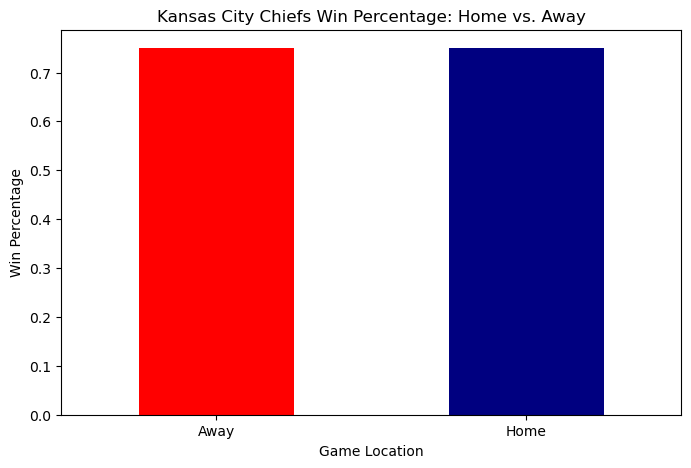

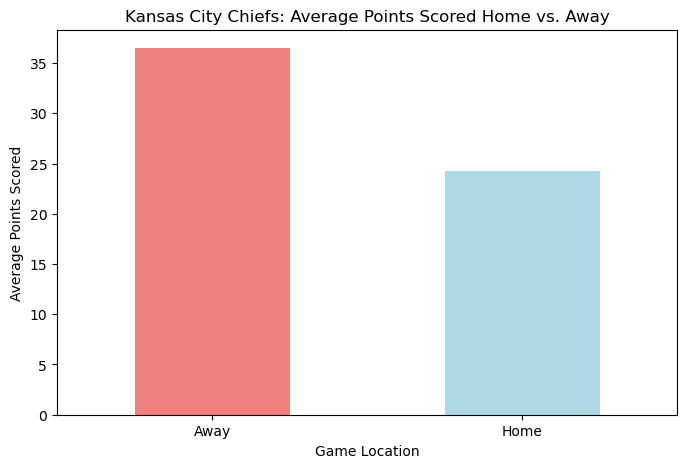

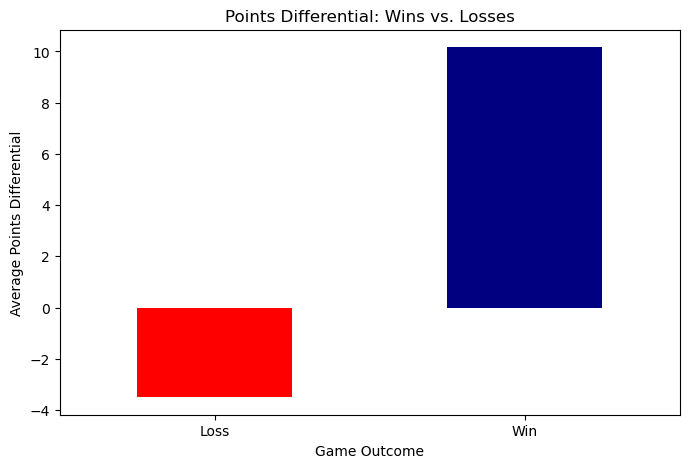

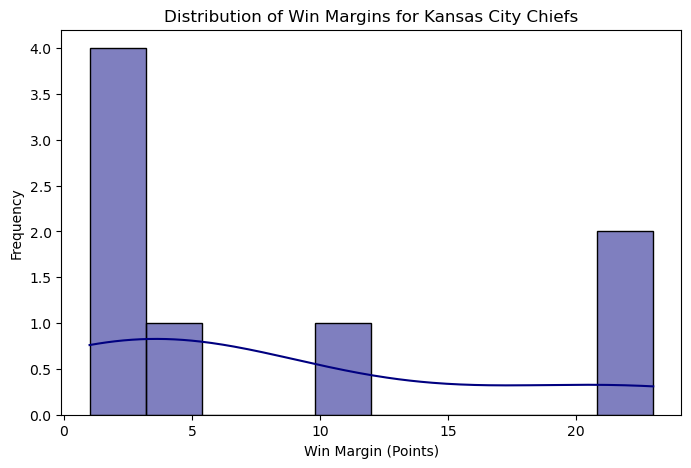

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define consistent colors
primary_color = 'navy'
secondary_color = 'red'
shade_primary = 'lightblue'
shade_secondary = 'lightcoral'

# Create a copy of the filtered DataFrame 
kc_games = kc_games.copy()

# Calculate whether KC is the home team
kc_games.loc[:, 'isHome'] = kc_games['homeTeamAbbr'] == 'KC'

# Calculate whether KC won the game
kc_games.loc[:, 'kcWin'] = ((kc_games['homeTeamAbbr'] == 'KC') & (kc_games['homeFinalScore'] > kc_games['visitorFinalScore'])) | \
                           ((kc_games['visitorTeamAbbr'] == 'KC') & (kc_games['visitorFinalScore'] > kc_games['homeFinalScore']))

# Calculate win percentage in home vs. away games
win_percentages = kc_games.groupby('isHome')['kcWin'].mean()

# Plot win percentages
plt.figure(figsize=(8, 5))
win_percentages.plot(kind='bar', color=[secondary_color, primary_color])
plt.xlabel('Game Location')
plt.ylabel('Win Percentage')
plt.title('Kansas City Chiefs Win Percentage: Home vs. Away')
plt.xticks([0, 1], ['Away', 'Home'], rotation=0)
plt.show()

# Calculate average points scored by KC in home vs. away games
kc_games['kcPoints'] = kc_games.apply(
    lambda row: row['homeFinalScore'] if row['homeTeamAbbr'] == 'KC' else row['visitorFinalScore'], axis=1
)
avg_points = kc_games.groupby('isHome')['kcPoints'].mean()

# Plot average points scored
plt.figure(figsize=(8, 5))
avg_points.plot(kind='bar', color=[shade_secondary, shade_primary])
plt.xlabel('Game Location')
plt.ylabel('Average Points Scored')
plt.title('Kansas City Chiefs: Average Points Scored Home vs. Away')
plt.xticks([0, 1], ['Away', 'Home'], rotation=0)
plt.show()

# Calculate points differential
kc_games['pointsDifferential'] = kc_games.apply(
    lambda row: (row['homeFinalScore'] - row['visitorFinalScore']) if row['homeTeamAbbr'] == 'KC' else
                (row['visitorFinalScore'] - row['homeFinalScore']), axis=1
)

# Separate games by win/loss
win_loss_diff = kc_games.groupby('kcWin')['pointsDifferential'].mean()

# Plot points differential
plt.figure(figsize=(8, 5))
win_loss_diff.plot(kind='bar', color=[secondary_color, primary_color])
plt.xlabel('Game Outcome')
plt.ylabel('Average Points Differential')
plt.title('Points Differential: Wins vs. Losses')
plt.xticks([0, 1], ['Loss', 'Win'], rotation=0)
plt.show()

# Calculate win margin for KC games
kc_games['winMargin'] = kc_games.apply(
    lambda row: abs(row['homeFinalScore'] - row['visitorFinalScore']), axis=1
)

# Plot the distribution of win margins
plt.figure(figsize=(8, 5))
sns.histplot(kc_games['winMargin'], bins=10, kde=True, color=primary_color)
plt.xlabel('Win Margin (Points)')
plt.ylabel('Frequency')
plt.title('Distribution of Win Margins for Kansas City Chiefs')
plt.show()


The spread of this distribution indicates that they occasionally blowout teams (i.e. have big winning margins)

## Tracking Data EDA

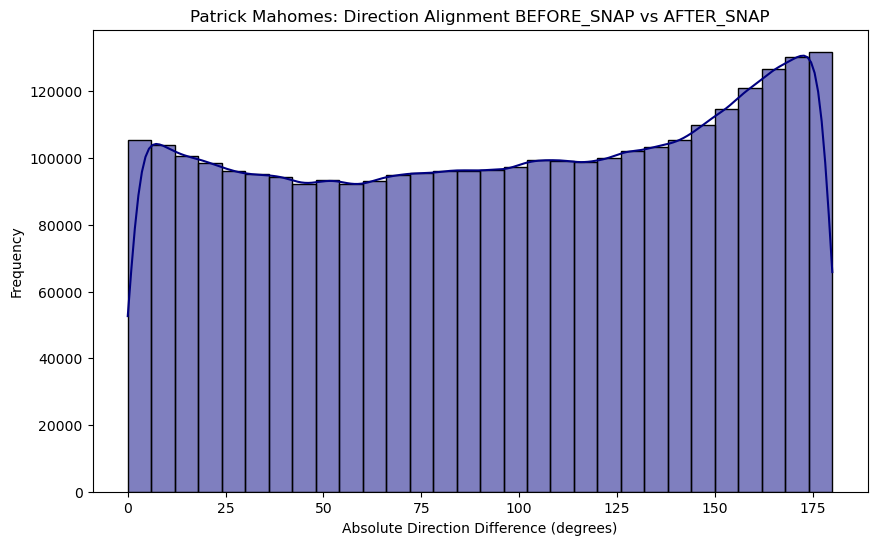

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for BEFORE_SNAP and AFTER_SNAP for Patrick Mahomes
before_snap = kc_tracking[(kc_tracking['frameType'] == 'BEFORE_SNAP') & (kc_tracking['displayName'] == 'Patrick Mahomes')]
after_snap = kc_tracking[(kc_tracking['frameType'] == 'AFTER_SNAP') & (kc_tracking['displayName'] == 'Patrick Mahomes')]

# Merge data based on gameId, playId, and nflId to compare the same plays
merged_data = before_snap.merge(
    after_snap,
    on=['gameId', 'playId', 'nflId'],
    suffixes=('_before', '_after')
)

# Calculate the absolute difference in direction (dir) between BEFORE_SNAP and AFTER_SNAP
merged_data['dir_diff'] = abs(merged_data['dir_before'] - merged_data['dir_after'])

# Limit differences to [0, 180] (as angles wrap around)
merged_data['dir_diff'] = merged_data['dir_diff'].apply(lambda x: x if x <= 180 else 360 - x)

# Visualization: Distribution of direction differences
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['dir_diff'], bins=30, kde=True, color='navy')
plt.xlabel('Absolute Direction Difference (degrees)')
plt.ylabel('Frequency')
plt.title('Patrick Mahomes: Direction Alignment BEFORE_SNAP vs AFTER_SNAP')
plt.show()



This histogram represents the absolute difference in direction (degrees) for Patrick Mahomes before the snap (BEFORE_SNAP) and after the snap (AFTER_SNAP). The x-axis shows the absolute difference in direction (dir_diff), ranging from 0° (no change in direction) to 180° (completely opposite direction). The y-axis shows the frequency of these differences. A significant number of plays show small direction changes, meaning Mahomes often continues moving in the same general direction as his pre-snap alignment. There’s also a peak at large direction changes (close to 180°), indicating that Mahomes frequently moves in the opposite direction of his pre-snap alignment. Between 30° and 150°, the distribution is relatively flat, indicating Mahomes’ direction changes span a wide range without a strong preference for moderate changes.

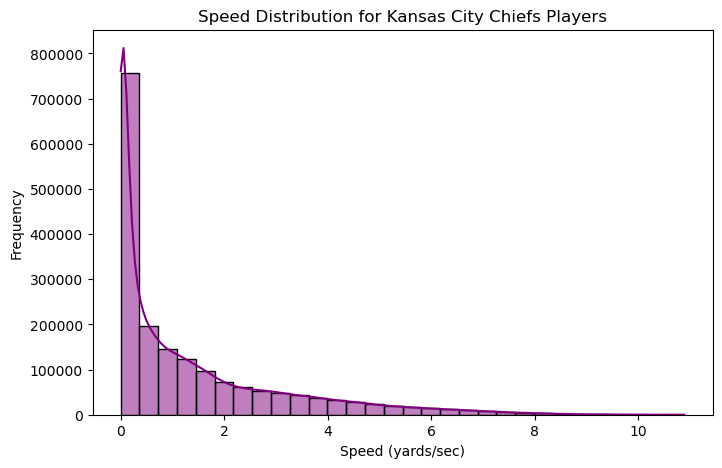

In [41]:
# Plot speed distribution for KC players
plt.figure(figsize=(8, 5))
sns.histplot(kc_tracking['s'], kde=True, bins=30, color='purple')
plt.xlabel('Speed (yards/sec)')
plt.ylabel('Frequency')
plt.title('Speed Distribution for Kansas City Chiefs Players')
plt.show()

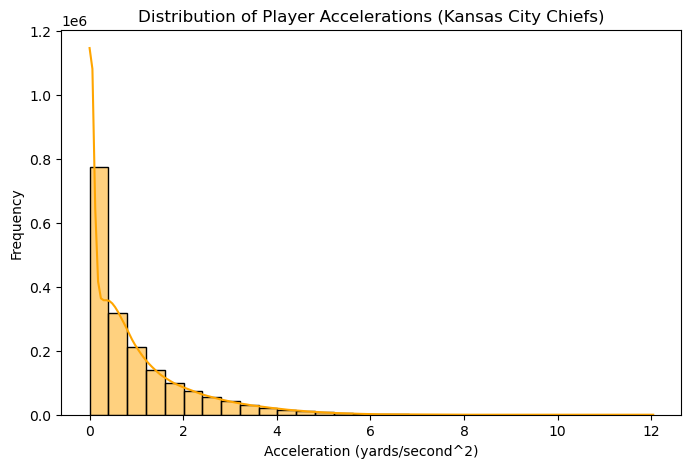

In [149]:
# how fast are players accelerating
# Plot distribution of acceleration
plt.figure(figsize=(8, 5))
sns.histplot(kc_tracking['a'], bins=30, kde=True, color='orange')
plt.xlabel('Acceleration (yards/second^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Accelerations (Kansas City Chiefs)')
plt.show()

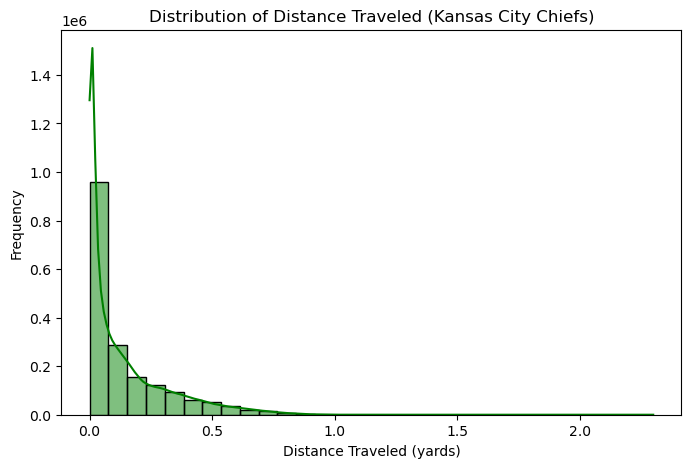

In [151]:
# Plot distribution of distance traveled
plt.figure(figsize=(8, 5))
sns.histplot(kc_tracking['dis'], bins=30, kde=True, color='green')
plt.xlabel('Distance Traveled (yards)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance Traveled (Kansas City Chiefs)')
plt.show()

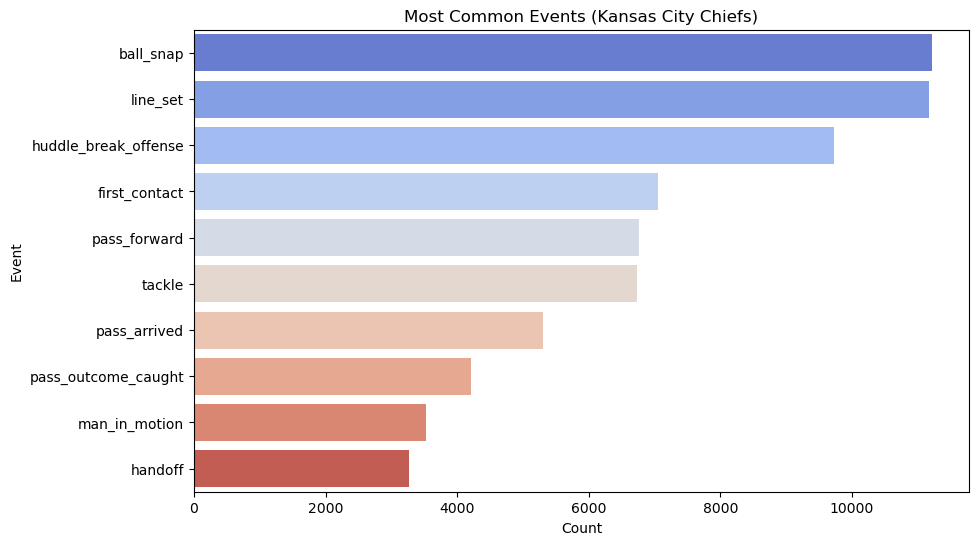

In [387]:
# Count most common events
event_counts = kc_tracking['event'].value_counts().head(10)

# Plot event counts
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.values, y=event_counts.index, hue=event_counts.index, dodge=False, palette='coolwarm', legend=False)
plt.xlabel('Count')
plt.ylabel('Event')
plt.title('Most Common Events (Kansas City Chiefs)')
plt.show()

## Feature Engineering 

In [63]:
# Create a copy of kc_plays to avoid SettingWithCopyWarning
kc_plays = kc_plays.copy()

# Step 1: Score Differential
kc_plays['scoreDifferential'] = kc_plays['preSnapHomeScore'] - kc_plays['preSnapVisitorScore']
kc_plays['isLeading'] = (kc_plays['scoreDifferential'] > 0).astype(int)

# Step 2: Field Position
kc_plays['isRedZone'] = (kc_plays['absoluteYardlineNumber'] <= 20).astype(int)

# Step 3: Down and Distance
kc_plays['shortYardage'] = (kc_plays['yardsToGo'] <= 2).astype(int)
kc_plays['thirdAndLong'] = ((kc_plays['down'] == 3) & (kc_plays['yardsToGo'] > 7)).astype(int)

# Step 4: Game Context
kc_plays['fourthQuarter'] = (kc_plays['quarter'] == 4).astype(int)
kc_plays['twoMinuteDrill'] = (kc_plays['quarter'] >= 2) & (kc_plays['gameClock'].str.split(':').str[0].astype(int) <= 2)


In [65]:
kc_plays['passResult'].value_counts()
kc_plays['passResult'].isna().sum()

161

In [13]:
kc_plays['playType'] = kc_plays['passResult'].apply(lambda x: 'run' if pd.isnull(x) else 'pass')
print(kc_plays[['passResult', 'playType']].head())

    passResult playType
3            C     pass
87         NaN      run
105          C     pass
111          C     pass
116          C     pass


## running predictive model ( GBDT ) without tracking variables

In [504]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare Data
# Include newly engineered features
features = ['yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading', 
            'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 
            'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation']

# Extract relevant columns
data = kc_plays[features + ['isDropback']].dropna()

# One-hot encode offensive formations
encoder = OneHotEncoder(sparse_output=False)
encoded_formations = encoder.fit_transform(data[['offenseFormation']])
formation_columns = [f'formation_{cat}' for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded_formations, columns=formation_columns)

# Merge encoded features back into the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=['offenseFormation'])

# Step 2: Define Features and Target
X = data.drop(columns=['isDropback'])
y = data['isDropback']

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.42      0.52        31
        True       0.79      0.92      0.85        74

    accuracy                           0.77       105
   macro avg       0.74      0.67      0.69       105
weighted avg       0.76      0.77      0.75       105

Accuracy Score:
0.7714285714285715


## Inlcuding Tracking Data into the Predictive Model: 

### aggregate tracking data

In [15]:
# Step 1: Filter pre-snap frames
pre_snap_tracking = kc_tracking[kc_tracking['frameType'] == 'BEFORE_SNAP']

# Step 2: Aggregated features per play
tracking_features = pre_snap_tracking.groupby(['gameId', 'playId']).agg(
    avg_x=('x', 'mean'),  # Average x-coordinate
    avg_y=('y', 'mean'),  # Average y-coordinate
    avg_speed=('s', 'mean'),  # Average speed
    max_speed=('s', 'max'),  # Maximum speed
    avg_dis=('dis', 'mean'),  # Average distance traveled
    total_dis=('dis', 'sum'),  # Total distance traveled
    avg_orientation=('o', 'mean'),  # Average orientation
    variance_orientation=('o', 'var'),  # Variance of orientation
).reset_index()



## doing some debuggings steps

In [17]:
# Check unique values in both datasets
print("Unique (gameId, playId) pairs in kc_plays:")
print(kc_plays[['gameId', 'playId']].drop_duplicates())

print("Unique (gameId, playId) pairs in tracking_features:")
print(tracking_features[['gameId', 'playId']].drop_duplicates())


Unique (gameId, playId) pairs in kc_plays:
           gameId  playId
3      2022110610     348
87     2022101610    3248
105    2022101000    2631
111    2022100213    2724
116    2022100213     102
...           ...     ...
16016  2022101000     573
16063  2022091110     291
16071  2022100213     593
16091  2022110610    2875
16121  2022092502    2337

[527 rows x 2 columns]
Unique (gameId, playId) pairs in tracking_features:
          gameId  playId
0     2022091110      55
1     2022091110      76
2     2022091110     102
3     2022091110     123
4     2022091110     149
...          ...     ...
1016  2022110610    4525
1017  2022110610    4581
1018  2022110610    4602
1019  2022110610    4621
1020  2022110610    4640

[1021 rows x 2 columns]


In [19]:
# Identify common keys
common_keys = pd.merge(
    kc_plays[['gameId', 'playId']].drop_duplicates(),
    tracking_features[['gameId', 'playId']].drop_duplicates(),
    on=['gameId', 'playId']
)

print("Number of common (gameId, playId) pairs:", len(common_keys))


Number of common (gameId, playId) pairs: 527


In [21]:
# Debug pre_snap_tracking
print("Shape of pre_snap_tracking:", pre_snap_tracking.shape)
print(pre_snap_tracking[['gameId', 'playId']].drop_duplicates())

# Check overlap with kc_plays
common_pre_snap = pd.merge(
    pre_snap_tracking[['gameId', 'playId']].drop_duplicates(),
    kc_plays[['gameId', 'playId']].drop_duplicates(),
    on=['gameId', 'playId']
)

print("Common rows between pre_snap_tracking and kc_plays:", len(common_pre_snap))


Shape of pre_snap_tracking: (1183083, 18)
             gameId  playId
0        2022101000      57
1859     2022101000     110
4224     2022101000     132
6523     2022101000     181
8360     2022101000     202
...             ...     ...
1799314  2022110610    4525
1801778  2022110610    4581
1803714  2022110610    4602
1805650  2022110610    4621
1807784  2022110610    4640

[1021 rows x 2 columns]
Common rows between pre_snap_tracking and kc_plays: 527


In [23]:
# Check for duplicates in tracking_features
duplicates = tracking_features[['gameId', 'playId']].duplicated().sum()
print("Number of duplicate rows in tracking_features:", duplicates)

Number of duplicate rows in tracking_features: 0


In [25]:
# Filter tracking_features for common (gameId, playId)
common_keys = kc_plays[['gameId', 'playId']].drop_duplicates()
tracking_features = tracking_features.merge(common_keys, on=['gameId', 'playId'], how='inner')

# Merge tracking features into kc_plays
kc_plays = kc_plays.merge(tracking_features, on=['gameId', 'playId'], how='left')

# Debug: Check merge results
print("After merge, kc_plays shape:", kc_plays.shape)
print("Number of NaN rows after merge:", kc_plays.isnull().sum().sum())

After merge, kc_plays shape: (527, 66)
Number of NaN rows after merge: 4682


In [27]:
# Check columns with NaNs
# Filter and display only columns with NaN values
columns_with_nans = kc_plays.isnull().sum()[kc_plays.isnull().sum() > 0]
print(columns_with_nans)


yardlineSide                 5
offenseFormation             5
receiverAlignment            5
passResult                 161
passLength                 197
targetX                    218
targetY                    218
dropbackType               153
dropbackDistance           157
passLocationType           181
timeToThrow                197
timeInTackleBox            193
timeToSack                 511
passTippedAtLine           181
unblockedPressure          161
qbSpike                    181
qbSneak                    346
rushLocationType           346
penaltyYards               512
pff_runConceptPrimary      283
pff_runConceptSecondary    461
pff_passCoverage             5
pff_manZone                  5
dtype: int64


In [29]:
# Step 1: Drop rows with missing values in 'offenseFormation'
kc_plays_subset = kc_plays.dropna(subset=['offenseFormation'])

# Step 2: Identify columns with missing values
columns_with_missing_values = kc_plays_subset.isnull().sum()

# Step 3: Handle columns based on NaN threshold
for col in columns_with_missing_values.index:
    if columns_with_missing_values[col] > 50:
        # Drop column if NaNs exceed threshold
        kc_plays_subset = kc_plays_subset.drop(columns=[col])
    else:
        # Drop rows with NaNs if count is below threshold
        kc_plays_subset = kc_plays_subset.dropna(subset=[col])

# Step 4: Verify that all missing values are handled
print("Missing values after handling:")
print(kc_plays_subset.isnull().sum())


Missing values after handling:
gameId                              0
playId                              0
playDescription                     0
quarter                             0
down                                0
yardsToGo                           0
possessionTeam                      0
defensiveTeam                       0
yardlineSide                        0
yardlineNumber                      0
gameClock                           0
preSnapHomeScore                    0
preSnapVisitorScore                 0
playNullifiedByPenalty              0
absoluteYardlineNumber              0
preSnapHomeTeamWinProbability       0
preSnapVisitorTeamWinProbability    0
expectedPoints                      0
offenseFormation                    0
receiverAlignment                   0
playClockAtSnap                     0
playAction                          0
qbKneel                             0
prePenaltyYardsGained               0
yardsGained                         0
homeTeamWinProbabil

In [31]:
kc_plays_subset.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'playAction', 'qbKneel', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runPassOption', 'pff_passCoverage', 'pff_manZone',
       'scoreDifferential', 'isLeading', 'isRedZone', 'shortYardage',
       'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 'playType', 'avg_x',
       'avg_y', 'avg_speed', 'max_speed', 'avg_dis', 'total_dis',
       'avg_orientation', 'variance_orientation'],
      dtype='object')

In [33]:
# Check the distribution of the target variable
class_distribution = kc_plays_subset['playType'].value_counts()
class_distribution 


playType
pass    362
run     155
Name: count, dtype: int64

Let's account for the imbalanced data using SMOTE (Synthetic Minority Oversampling Technique)

SMOTE focuses on the underrepresented class (run plays).
Generate Synthetic Samples: Instead of simply copying rows, SMOTE:
 - Selects a random sample from the minority class.
 - Finds its nearest neighbors in feature space.
 - Generates new synthetic samples along the line connecting the original sample and its neighbors.
Balance the Dataset: The generated synthetic samples increase the number of minority class instances, resulting in a more balanced dataset.

Why Does SMOTE Improve Predictions?
 - Reduces Bias: By balancing the dataset, SMOTE ensures the model does not focus excessively on the majority class, improving its ability to predict the minority class (run plays).
 - Preserves Generalization: Synthetic samples created by SMOTE are based on interpolation, preventing overfitting that can occur with simple duplication of minority samples.
 - Improves Recall and F1-Score: With more balanced data, the model achieves better performance on both precision and recall, especially for the minority class.


### New Model Including Tracking Features and using SMOTE

Classification Report:
              precision    recall  f1-score   support

        pass       0.82      0.89      0.86        73
         run       0.68      0.55      0.61        31

    accuracy                           0.79       104
   macro avg       0.75      0.72      0.73       104
weighted avg       0.78      0.79      0.78       104

Accuracy Score: 0.7884615384615384


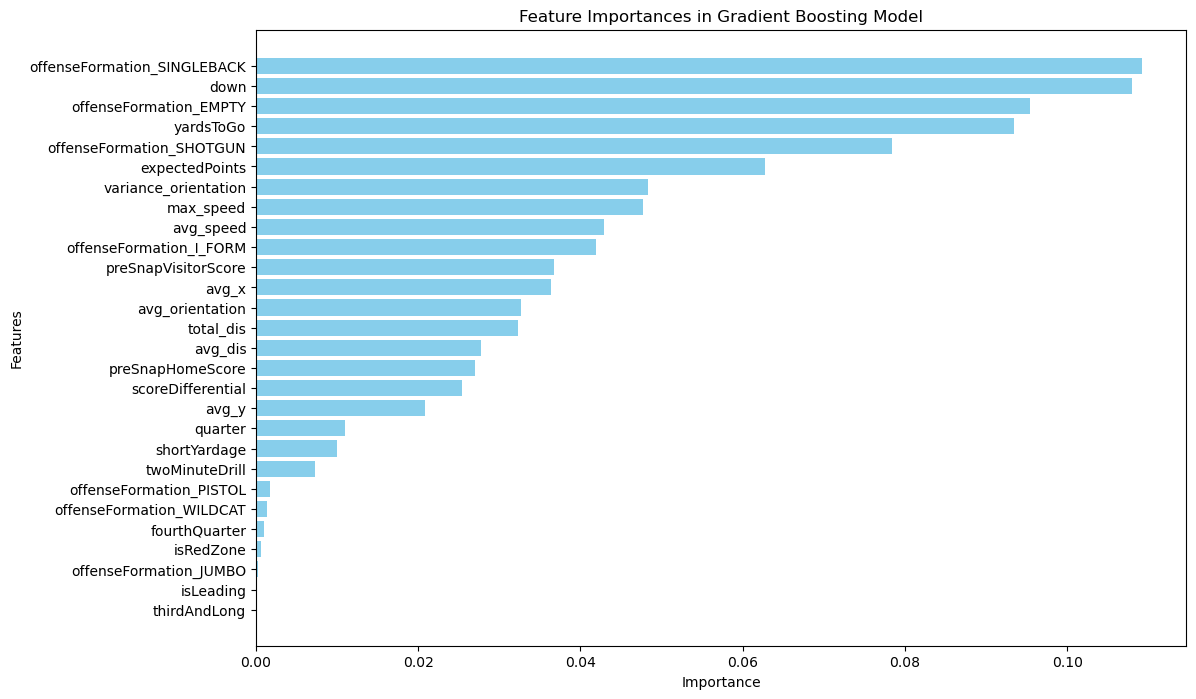

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
# Visualization libraries
import matplotlib.pyplot as plt

#  'kc_plays_subset' is your final cleaned and merged dataset

# Step 1: Define Features and Target Variable
# Include all relevant features from the merged dataset
features = [
    'yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading',
    'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill',
    'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation',
    'avg_x', 'avg_y', 'avg_speed', 'max_speed', 'avg_dis', 'total_dis',
    'avg_orientation', 'variance_orientation', 'motionEvent'
]

# Ensure all features are present in the dataset
features = [feature for feature in features if feature in kc_plays_subset.columns]

# Extract features (X) and target variable (y)
X = kc_plays_subset[features]
y = kc_plays_subset['playType']

# Step 2: One-Hot Encode Categorical Variables
# For 'offenseFormation' and any other categorical variables
categorical_features = ['offenseFormation']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use 'sparse_output' instead of 'sparse'

# Fit and transform the categorical features
X_encoded = encoder.fit_transform(X[categorical_features])

# Get the feature names for the encoded variables
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame with the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names, index=X.index)

# Drop the original categorical columns and concatenate the encoded ones
X = X.drop(columns=categorical_features)
X = pd.concat([X, X_encoded_df], axis=1)

# Step 3: Train-Test Split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Apply SMOTE to the Training Data
# SMOTE should be applied only to the training data to prevent data leakage
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Train the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 6: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot Feature Importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Gradient Boosting Model')
plt.show()


In [37]:
train_accuracy = model.score(X_train_resampled, y_train_resampled)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9723
Test Accuracy: 0.7885


In [87]:
kc_plays_subset['offenseFormation'].value_counts()

offenseFormation
SHOTGUN       386
SINGLEBACK     52
EMPTY          41
I_FORM         23
PISTOL          8
JUMBO           4
WILDCAT         3
Name: count, dtype: int64

# Predicting Run Locations

In [59]:
kc_plays_rush = kc_plays.copy()  # Create a copy to preserve the original

In [61]:
kc_plays_rush.columns    #['rushLocationType']#.isnull().sum()

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

### feature engineering

In [63]:
# Field zones
kc_plays_rush['normalizedFieldPosition'] = kc_plays_rush['absoluteYardlineNumber'] / 100  # Normalize yardline

# Add run-specific context
kc_plays_rush['shortYardage'] = (kc_plays_rush['yardsToGo'] <= 2).astype(int)
kc_plays_rush['thirdAndLong'] = ((kc_plays_rush['down'] == 3) & (kc_plays_rush['yardsToGo'] > 7)).astype(int)

# Momentum and spread from tracking data
kc_plays_rush['momentum'] = kc_plays_rush['avg_speed'] * kc_plays_rush['avg_dis']  # Momentum as speed * distance
kc_plays_rush['positionalSpreadX'] = kc_plays_rush['avg_x'] / kc_plays_rush['variance_orientation']  # Spread in x
kc_plays_rush['positionalSpreadY'] = kc_plays_rush['avg_y'] / kc_plays_rush['variance_orientation']  # Spread in y

# Fill NaN values in engineered features if any
kc_plays_rush.fillna(0, inplace=True)

kc_plays_rush.columns


Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [65]:
print(kc_plays_rush['rushLocationType'].dtype)  # Check if it's a string or int
print(kc_plays_rush['rushLocationType'].unique())  # Inspect unique values to confirm their types


object
[0 'OUTSIDE_RIGHT' 'INSIDE_LEFT' 'OUTSIDE_LEFT' 'INSIDE_RIGHT' 'UNKNOWN']


In [67]:
kc_plays_rush['rushLocationType'] = kc_plays_rush['rushLocationType'].astype(str)


In [69]:
# Step 1: Remove rows with invalid values (e.g., 0)
kc_plays_rush = kc_plays_rush[kc_plays_rush['rushLocationType'] != '0']

In [71]:
# Step 2: Optional - Drop rows with 'UNKNOWN'
#kc_plays_rush = kc_plays_rush[kc_plays_rush['rushLocationType'] != 'UNKNOWN']

# Step 3: Verify the cleaned column
print(kc_plays_rush['rushLocationType'].value_counts())

rushLocationType
INSIDE_LEFT      64
INSIDE_RIGHT     57
OUTSIDE_LEFT     31
OUTSIDE_RIGHT    24
UNKNOWN           5
Name: count, dtype: int64


In [75]:
# Step 3: Verify the cleaned column
print(kc_plays_rush['rushLocationType'].unique())  # Should not include '0'

['OUTSIDE_RIGHT' 'INSIDE_LEFT' 'OUTSIDE_LEFT' 'INSIDE_RIGHT' 'UNKNOWN']


In [73]:
# Ensure all values in 'offenseFormation' from kc_plays_rush are strings
kc_plays_rush['offenseFormation'] = kc_plays_rush['offenseFormation'].astype(str)

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Clean the target column
kc_plays_rush = kc_plays_rush[kc_plays_rush['rushLocationType'] != '0']
kc_plays_rush = kc_plays_rush[kc_plays_rush['rushLocationType'] != 'UNKNOWN']

# Step 2: Select features and target
features = [
    'yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading',
    'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill',
    'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation',
    'avg_x', 'avg_y', 'avg_speed', 'max_speed', 'avg_dis', 'total_dis',
    'avg_orientation', 'variance_orientation',
    'normalizedFieldPosition', 'momentum', 'positionalSpreadX', 'positionalSpreadY'
]
target = 'rushLocationType'

# Filter data for non-missing target values
kc_plays_rush = kc_plays_rush.dropna(subset=[target])

# Keep only relevant features and the target
data = kc_plays_rush[features + [target]]

# Step 3: Encode categorical features
categorical_features = ['offenseFormation']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Merge encoded features into the dataset
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)
data = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

# Step 4: Encode the target variable
data[target] = data[target].astype(str)
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

# Define Features (X) and Target (y)
X = data.drop(columns=[target])
y = data[target]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Apply SMOTE to the Training Data Only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 7: Train the Gradient Boosting Model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features:")
print(feature_importances.head(10))


Classification Report:
               precision    recall  f1-score   support

  INSIDE_LEFT       0.45      0.38      0.42        13
 INSIDE_RIGHT       0.40      0.50      0.44        12
 OUTSIDE_LEFT       0.33      0.33      0.33         6
OUTSIDE_RIGHT       0.50      0.40      0.44         5

     accuracy                           0.42        36
    macro avg       0.42      0.40      0.41        36
 weighted avg       0.42      0.42      0.42        36

Accuracy Score:
0.4166666666666667
Top Features:
                    Feature  Importance
26  offenseFormation_I_FORM    0.126093
16                max_speed    0.100796
3            expectedPoints    0.075797
20     variance_orientation    0.075518
23        positionalSpreadX    0.067832
24        positionalSpreadY    0.066939
19          avg_orientation    0.063048
4         scoreDifferential    0.061727
13                    avg_x    0.046955
14                    avg_y    0.040067


AUC for INSIDE_LEFT: 0.5284
AUC for INSIDE_RIGHT: 0.4479
AUC for OUTSIDE_LEFT: 0.7389
AUC for OUTSIDE_RIGHT: 0.7484


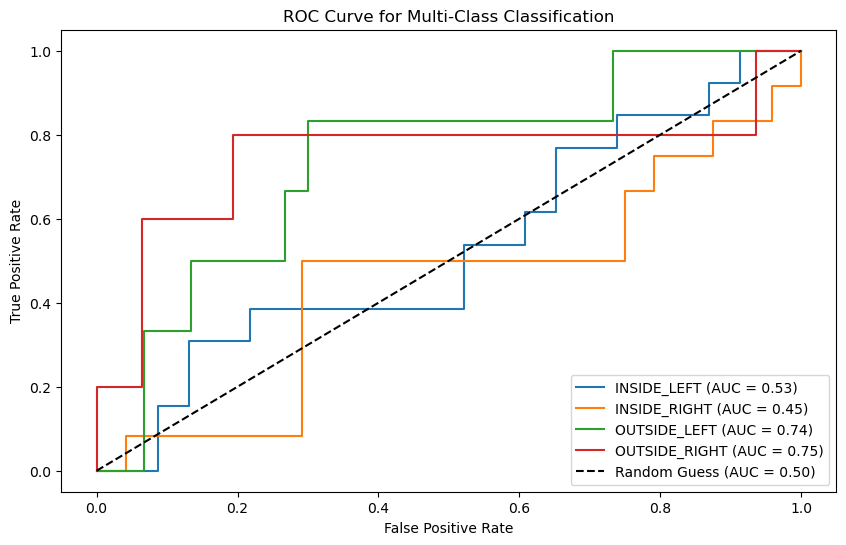

In [81]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 10: Calculate Predicted Probabilities
# Get predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

# Step 11: Compute AUC for Each Class
# If it's a multi-class problem, calculate AUC for each class
auc_scores = {}
for i, class_name in enumerate(label_encoder.classes_):
    auc = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])
    auc_scores[class_name] = auc
    print(f"AUC for {class_name}: {auc:.4f}")

# Step 12: Plot ROC Curve for Each Class
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_scores[class_name]:.2f})")

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend(loc="best")
plt.show()


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Step 1: Binarize the labels
# This converts multi-class labels into a binary format required for AUC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Step 2: Calculate AUC for the entire model
# Use predicted probabilities for all classes
overall_auc_macro = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
overall_auc_weighted = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')

print(f"Overall Macro-Averaged AUC: {overall_auc_macro:.4f}")
print(f"Overall Weighted-Averaged AUC: {overall_auc_weighted:.4f}")


Overall Macro-Averaged AUC: 0.6159
Overall Weighted-Averaged AUC: 0.5672


In [79]:
train_accuracy = model.score(X_train_resampled, y_train_resampled)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.4167
